#### 코드 참조 
[1] https://github.com/rickiepark/machine-learning-with-python-cookbook
[2] https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html 
[3] https://github.com/mikexcohen/LinAlgBook/blob/main/python
[4] https://docs.sympy.org/latest/tutorial/matrices.html
[5] Dr. Jaewook Lee's Lecture Notes

## 3장 최소 좌승법과 QR 분해

## 3.1 그람슈미트 직교화(GS orthogonalization)

In [9]:
## import libraries for the entire chapter
import numpy as np
# create the matrix 
m = 4
n = 4
A = np.random.randn(m,n)

# initialize
Q = np.zeros((m,n))


# the GS algo
for i in range(n):
    
    # initialize
    Q[:,i] = A[:,i]
    
    # orthogonalize
    a = A[:,i] # convenience
    for j in range(i): # only to earlier cols
        q = Q[:,j] # convenience
        Q[:,i]=Q[:,i]-np.dot(a,q)/np.dot(q,q)*q
    
    # normalize
    Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])


In [10]:
# "real" QR decomposition for comparison
Q2,R = np.linalg.qr(A)


# note the possible sign differences.
# seemingly non-zero columns will be 0 when adding
Q-Q2

array([[ 1.57577254e+00,  5.55111512e-17,  8.73430926e-01,
        -8.55962370e-01],
       [-8.19690949e-01,  5.55111512e-17, -2.93560047e-01,
        -1.71469812e+00],
       [-8.01316416e-01, -5.55111512e-17,  1.65025072e+00,
         3.32440313e-01],
       [-4.50488231e-01,  1.11022302e-16,  6.53921612e-01,
        -4.65426920e-01]])

In [4]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [7]:
c1, c2 = 5.0, 2.0
i = np.r_[1:11]
i

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [119]:
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
c, resid, rank, sigma = linalg.lstsq(A, zi)

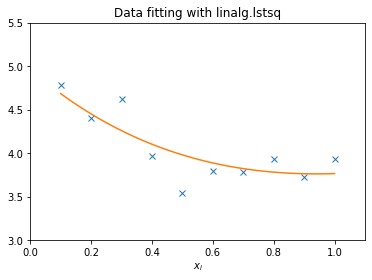

In [120]:
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2
plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

In [121]:
q, r = linalg.qr(A)
np.allclose(A, np.dot(q, r))

True

In [130]:
A.shape, q.shape, r.shape

((10, 2), (10, 10), (10, 2))

In [123]:
# either both Q and R (‘full’, default), only R (‘r’) or 
# both Q and R but computed in economy-size (‘economic’, see Notes)
r2 = linalg.qr(A, mode='r')
np.allclose(r, r2)

True

In [125]:
q3, r3 = linalg.qr(A, mode='economic')
q3.shape, r3.shape

((10, 2), (2, 2))

In [131]:
q3.T@ zi

array([-12.56956849,   2.61279847])

In [133]:
x=np.linalg.solve(r3, q3.T@ zi)
x, c

(array([4.96165066, 1.93854873]), array([4.96165066, 1.93854873]))

## 3.2 최소좌승법 예제

In [13]:
## import libraries for the entire chapter
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# load the data
data = np.loadtxt(fname='widget_data.txt',delimiter=',')

# design matrix
X = np.concatenate((np.ones((1000,1)),data[:,:2]),axis=1)

# outcome variable
y = data[:,2]

# beta coefficients
beta = np.linalg.lstsq(X,y)[0]

# scaled coefficients (intercept not scaled)
betaScaled = beta/np.std(X,axis=0,ddof=1)

<ipython-input-14-bfea51dbda64>:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(X,y)[0]
<ipython-input-14-bfea51dbda64>:14: RuntimeWarning: divide by zero encountered in true_divide
  betaScaled = beta/np.std(X,axis=0,ddof=1)


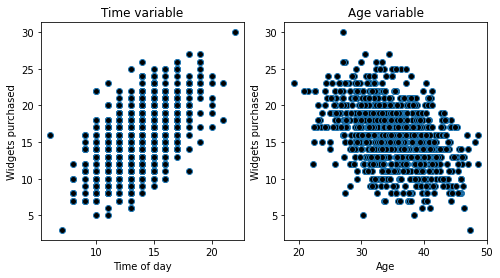

In [15]:
# setup the figure
fig,ax = plt.subplots(1,2,figsize=(8,4))

# plot widgets by time
ax[0].plot(X[:,1],y,'o',markerfacecolor='k')
ax[0].set_title('Time variable')
ax[0].set_xlabel('Time of day')
ax[0].set_ylabel('Widgets purchased')

# plot widgets by age
ax[1].plot(X[:,2],y,'o',markerfacecolor='k')
ax[1].set_title('Age variable')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Widgets purchased')
plt.show()

In [16]:
# predicted data
yHat = X@beta

# r-squared
r2 = 1 - np.sum((yHat-y)**2) / np.sum((y-np.mean(y))**2)
r2

0.3663899451013619